# About Dataset
## Context
Kumpulan data berisi survei kepuasan penumpang maskapai penerbangan. Faktor apa yang sangat berkorelasi dengan kepuasan (atau ketidakpuasan) penumpang? Tujuan dari dataset untuk memprediksi kepuasan penumpang?

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

## Content
`Gender`: Jenis kelamin penumpang (Female, Male)<br>
`Customer Type`: Tipe pelanggan (Loyal customer, disloyal customer)<br>
`Age`: Usia sebenarnya dari penumpang<br>
`Type of Travel`: Tipe penerbangan penumpang (Personal Travel, Business Travel)<br>
`Class`: Kelas perjalanan di pesawat penumpang (Business, Eco, Eco Plus)<br>
`Flight distance`: Jarak penerbangan dari perjalanan<br>
`Inflight wifi service`: Tingkat kepuasan layanan wifi dalam pesawat (0:Not Applicable;1-5)<br>
`Departure/Arrival time convenient`: Tingkat kepuasan waktu Keberangkatan/Kedatangan nyaman<br>
`Ease of Online booking`: Tingkat kepuasan pemesanan online<br>
`Gate location`: Tingkat kepuasan lokasi Gerbang<br>
`Food and drink`: Tingkat kepuasan Makanan dan minuman<br>
`Online boarding`: Tingkat kepuasan boarding online<br>
`Seat comfort`: Tingkat kepuasan kenyamanan tempat duduk<br>
`Inflight entertainment`: Tingkat kepuasan hiburan dalam pesawat<br>
`On-board service`: Tingkat kepuasan layanan On-board<br>
`Leg room service`: Tingkat kepuasan pelayanan kamar Kaki<br>
`Baggage handling`: Tingkat kepuasan penanganan bagasi<br>
`Check-in service`: Tingkat kepuasan pelayanan Check-in<br>
`Inflight service`: Tingkat kepuasan pelayanan dalam pesawat<br>
`Cleanliness`: Tingkat kepuasan Kebersihan<br>
`Departure Delay in Minutes`: Menit tertunda saat keberangkatan<br>
`Arrival Delay in Minutes`: Menit tertunda saat Kedatangan<br>
`Satisfaction`: Tingkat kepuasan maskapai penerbangan(Satisfaction, neutral or dissatisfaction)<br>

# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("data/train.csv", index_col="id")
df_test = pd.read_csv("data/test.csv", index_col="id")

In [3]:
df_train.drop(columns='Unnamed: 0', inplace=True)
df_test.drop(columns='Unnamed: 0', inplace=True)

df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

# Splitting Dataset

In [4]:
X_train = df_train.drop(columns="satisfaction")
y_train = df_train.satisfaction

X_test = df_test.drop(columns="satisfaction")
y_test = df_test.satisfaction

# Mini Feature Engineering

In [5]:
y_train = y_train.replace({'neutral or dissatisfied': 0, 'satisfied': 1})
y_test = y_test.replace({'neutral or dissatisfied': 0, 'satisfied': 1})

X_train.drop(columns=["Age", "Gender", "Flight Distance", "Leg room service", 
                      "Departure/Arrival time convenient"]
            , inplace=True)

X_test.drop(columns=["Age", "Gender", "Flight Distance", "Leg room service", 
                      "Departure/Arrival time convenient"]
            , inplace=True)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Training

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters_xgb = {
    "learning_rate": [0.1, 0.01, 0.001],
    "max_depth": [3, 5, 7],
    "gamma": [0, 0.1, 0.2],
    "colsample_bytree": [0.5, 0.8, 1],
    "reg_alpha": [0.001, 0.01, 0.1],
    "reg_lambda": [0.001, 0.01, 0.1]
}

In [7]:
xgb = XGBClassifier(n_jobs=-1, random_state=42)
xgbCV = RandomizedSearchCV(xgb, parameters_xgb, n_iter=50, cv=3, verbose=1, n_jobs=-1, random_state=42)
xgbCV.fit(X_train, y_train)

print("Best hyperparameters: ", xgbCV.best_params_)
print("Best accuracy: ", xgbCV.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters:  {'reg_lambda': 0.1, 'reg_alpha': 0.001, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best accuracy:  0.95991080302858


## Versi 2

In [8]:
from scipy.stats import loguniform

In [9]:
parameters_xgb2 = {
    "learning_rate": loguniform(0.001, 1),
    "max_depth": [3, 5, 7],
    "gamma": loguniform(0.001, 10),
    "colsample_bytree": loguniform(0.1, 10),
    "reg_alpha": loguniform(0.001, 10),
    "reg_lambda": loguniform(0.001, 10)
}

In [10]:
xgbV2 = XGBClassifier(n_jobs=-1, random_state=42)
xgbCV2 = RandomizedSearchCV(xgbV2, parameters_xgb2, n_iter=50, cv=3, verbose=1, n_jobs=-1, random_state=42)
xgbCV2.fit(X_train, y_train)

print("Best hyperparameters: ", xgbCV2.best_params_)
print("Best accuracy: ", xgbCV2.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters:  {'colsample_bytree': 0.5404103854647327, 'gamma': 0.06672367170464205, 'learning_rate': 0.22673986523780396, 'max_depth': 7, 'reg_alpha': 0.03387255565852147, 'reg_lambda': 8.568869785189001}
Best accuracy:  0.9603258889899867


## Versi 3

In [11]:
parameters_xgbV3 = {
    "learning_rate": loguniform(0.1, 5),
    "max_depth": [5, 7, 8],
    "gamma": loguniform(0.01, 5),
    "colsample_bytree": loguniform(0.1, 5),
    "reg_alpha": loguniform(0.01, 5),
    "reg_lambda": loguniform(0.1, 10)
}

In [12]:
xgbV3 = XGBClassifier(n_jobs=-1, random_state=42)
xgbCV3 = RandomizedSearchCV(xgbV3, parameters_xgbV3, n_iter=50, cv=3, verbose=1, n_jobs=-1, random_state=42)
xgbCV3.fit(X_train, y_train)

print("Best hyperparameters: ", xgbCV3.best_params_)
print("Best accuracy: ", xgbCV3.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters:  {'colsample_bytree': 0.9057082025766674, 'gamma': 0.7536627571597798, 'learning_rate': 0.17247254096754364, 'max_depth': 8, 'reg_alpha': 0.12811830949395145, 'reg_lambda': 3.2441600887341595}
Best accuracy:  0.9616773179574487


## Versi 4

In [9]:
parameters_xgbV4 = {
    "learning_rate": loguniform(0.1, 4),
    "max_depth": [8, 9, 10],
    "gamma": loguniform(0.3, 5),
    "colsample_bytree": loguniform(0.5, 5),
    "reg_alpha": loguniform(0.1, 5),
    "reg_lambda": loguniform(2, 10)
}

In [10]:
xgbV4 = XGBClassifier(n_jobs=-1, random_state=42)
xgbCV4 = RandomizedSearchCV(xgbV4, parameters_xgbV4, n_iter=100, cv=3, verbose=1, n_jobs=-1, random_state=42)
xgbCV4.fit(X_train, y_train)

print("Best hyperparameters: ", xgbCV4.best_params_)
print("Best accuracy: ", xgbCV4.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\gufra\Desktop\Airlane Passenger\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gufra\Desktop\Airlane Passenger\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gufra\Desktop\Airlane Passenger\env\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\gufra\Desktop\Airlane Passenger\env\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = tra

Best hyperparameters:  {'colsample_bytree': 0.7031644959269149, 'gamma': 4.968316095205033, 'learning_rate': 0.2675464479063196, 'max_depth': 9, 'reg_alpha': 0.7145565133513969, 'reg_lambda': 2.1727617071801024}
Best accuracy:  0.9618896858418436


## Evaluasi

In [21]:
print(f"Versi 1 = Training: {xgbCV.score(X_train, y_train)*100:.2f}% | Testing: {xgbCV.score(X_test, y_test)*100:.2f}%")
print(f"Versi 2 = Training: {xgbCV2.score(X_train, y_train)*100:.2f}% | Testing: {xgbCV2.score(X_test, y_test)*100:.2f}%")
print(f"Versi 3 = Training: {xgbCV3.score(X_train, y_train)*100:.2f}% | Testing: {xgbCV3.score(X_test, y_test)*100:.2f}%")
print(f"Versi 4 = Training: {xgbCV4.score(X_train, y_train)*100:.2f}% | Testing: {xgbCV4.score(X_test, y_test)*100:.2f}%")

Versi 1 = Training: 96.46% | Testing: 96.14%
Versi 2 = Training: 96.72% | Testing: 96.19%
Versi 3 = Training: 97.05% | Testing: 96.27%
Versi 4 = Training: 96.67% | Testing: 96.35%


[[14228   300]
 [  646 10719]]


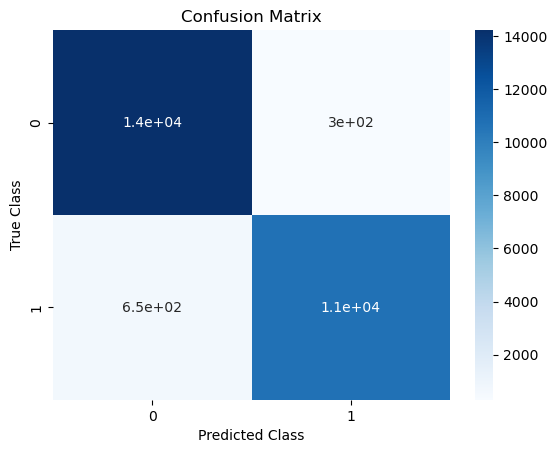

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = xgbCV4.predict(X_test)

print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



# Feature Importance

In [26]:
best_params = xgbCV4.best_params_

xgbV4 = XGBClassifier(**best_params, random_state=42, n_jobs=-1)
xgbV4.fit(X_train, y_train)

xgbV4.score(X_train, y_train), xgbV4.score(X_test, y_test)

(0.9667162190860474, 0.9634650291584598)

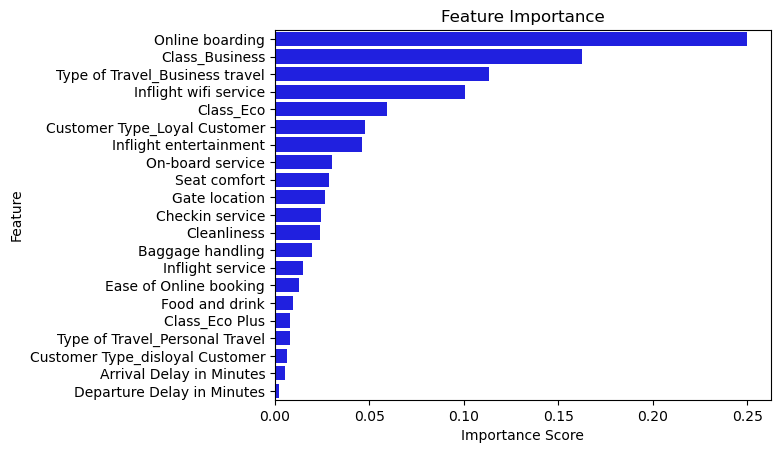

In [27]:
feature_importance = xgbV4.feature_importances_
feature_names = list(X_train.columns)

# Create Dataframe from feature name and feature importance value
data = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# sort the data by importance score
data.sort_values('importance', ascending=False, inplace=True)

sns.barplot(x='importance', y='feature', data=data, color='blue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.show()

# Save Model

In [28]:
import pickle

In [31]:
with open("model/model_airlance.pkl", "wb") as file:
    pickle.dump(xgbV4, file)